# <center> Morphological Operations on Images

 Morphology is a broad set of image processing operations that process images based on shapes. In a morphological operation, each pixel in the image is adjusted based on the value of other pixels in its neighborhood.  By choosing the shape and size of the neighborhood pixel, you can construct a morphological operation that is sensitive to specific shapes in the input image.

Text(0.5, 1.0, 'Original')

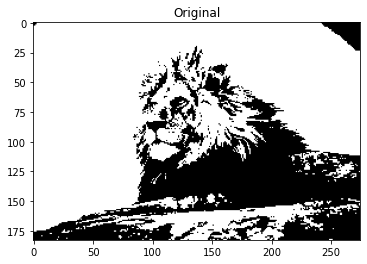

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

   
def image_plot_multiple(title,image):
    L=len(title)
    ncols=min(L,3)
    nrows=int(np.ceil(L/ncols))
    plt.subplots(nrows,ncols,figsize=(5*ncols,nrows*5))
    for i,item in enumerate(title):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB))
        plt.title(title[i])

L=91
H=255
image_path=os.path.join('images','lion.jpeg')
image=cv2.imread(image_path,0) 
gray_mask=cv2.inRange(image, L,H)
plt.imshow(gray_mask,cmap='gray')
plt.title('Original')

## Image Dilation

Add pixels to the image

Text(0.5, 1.0, 'Dilated')

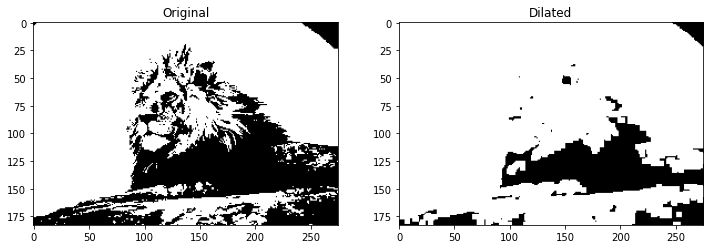

In [2]:
kernel=np.ones((5,5),np.uint8)
dilated_image=cv2.dilate(gray_mask,kernel,iterations=1)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray_mask,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(dilated_image,cmap='gray')
plt.title('Dilated')

### Comparison of number of white pixels and black pixels in the original and dilated image

Text(0.5, 1.0, 'Dilated Image Barplot')

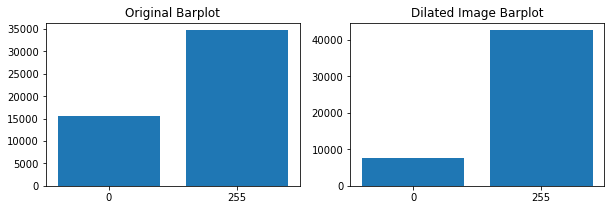

In [3]:
plt.subplots(1,2,figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(['0','255'],[np.count_nonzero(gray_mask==0),np.count_nonzero(gray_mask==255)])
plt.title('Original Barplot')
plt.subplot(1,2,2)
plt.bar(['0','255'],[np.count_nonzero(dilated_image==0),np.count_nonzero(dilated_image==255)])
plt.title('Dilated Image Barplot')

## Image Eroison
Removes pixels from the image


Text(0.5, 1.0, 'Erosion')

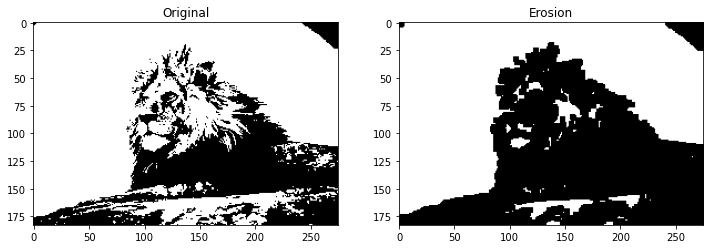

In [4]:
kernel=np.ones((5,5),np.uint8)
eroded_image=cv2.erode(gray_mask,kernel,iterations=1)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray_mask,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(eroded_image,cmap='gray')
plt.title('Erosion')

### Comparison of number of white pixels and black pixels in the original and eroded image

Text(0.5, 1.0, 'Eroded image Barplot')

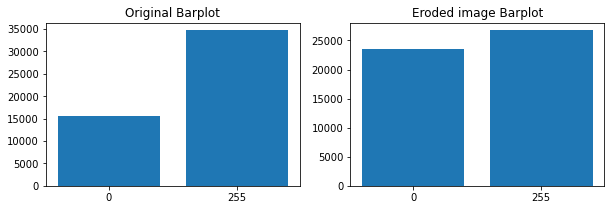

In [5]:
plt.subplots(1,2,figsize=(10,3))
plt.subplot(1,2,1)
plt.bar(['0','255'],[np.count_nonzero(gray_mask==0),np.count_nonzero(gray_mask==255)])
plt.title('Original Barplot')
plt.subplot(1,2,2)
plt.bar(['0','255'],[np.count_nonzero(eroded_image==0),np.count_nonzero(eroded_image==255)])
plt.title('Eroded image Barplot')

## Image Opening

Eroison followed by Dilation

Text(0.5, 1.0, 'Opening operation')

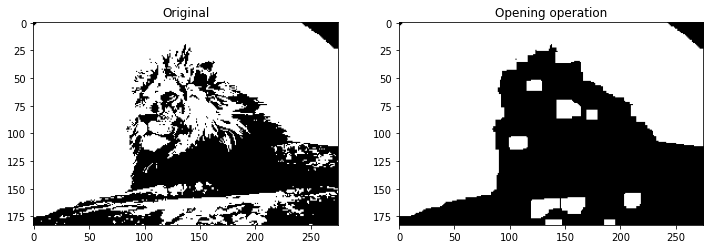

In [6]:
kernel=np.ones((5,5),np.uint8)
imageOpening=cv2.morphologyEx(gray_mask,cv2.MORPH_OPEN,kernel,iterations=2)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray_mask,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imageOpening,cmap='gray')
plt.title('Opening operation')

## Image Closing

Dilation Followed by eroison

Text(0.5, 1.0, 'Closing operation')

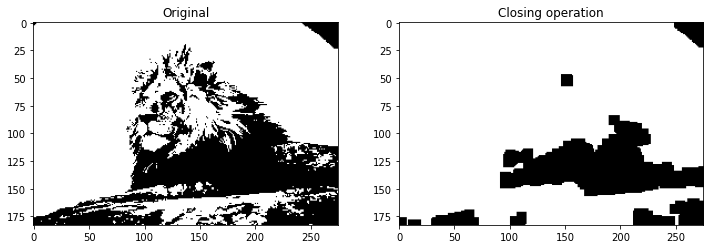

In [7]:
kernel=np.ones((5,5),np.uint8)
imageClose=cv2.morphologyEx(gray_mask,cv2.MORPH_CLOSE,kernel,iterations=2)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray_mask,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imageClose,cmap='gray')
plt.title('Closing operation')

## Gradient of an image

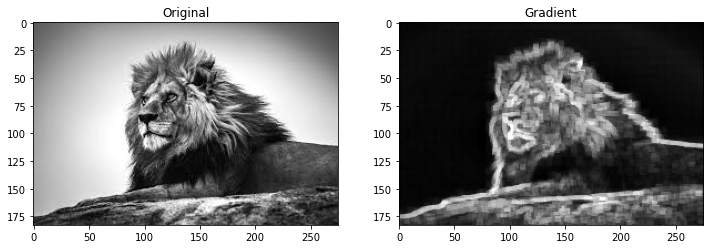

In [8]:
image_path=os.path.join('images','lion.jpeg' )
image=cv2.imread(image_path,0)
kernel=np.ones((5,5),np.uint8)
gradient=cv2.morphologyEx(image,cv2.MORPH_GRADIENT,kernel,iterations=1)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.title('Gradient')
fig=plt.imshow(gradient,cmap='gray')

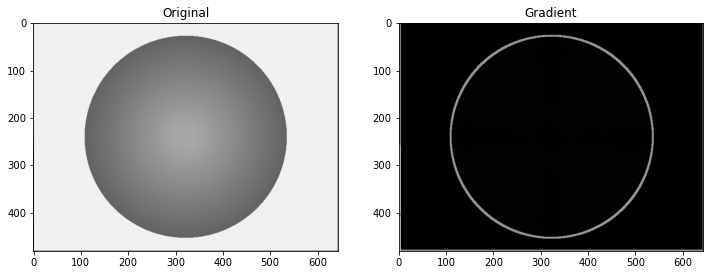

In [9]:
image_path=os.path.join('images','grad.png' )
image=cv2.imread(image_path,0)
kernel=np.ones((5,5),np.uint8)
gradient=cv2.morphologyEx(image,cv2.MORPH_GRADIENT,kernel,iterations=1)
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.title('Gradient')
fig=plt.imshow(gradient,cmap='gray')

# Noise Removal using Morphological Operations

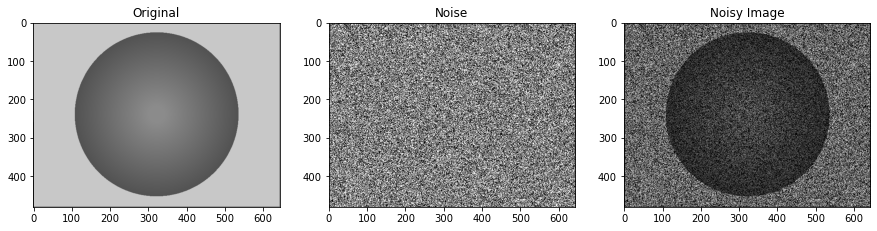

In [10]:
image_path=os.path.join('images','grad.png')#coloured image
image=cv2.imread(image_path,0)
noise_image=np.random.randint(0,2,image.shape,np.uint8)*255
image_noisy=cv2.bitwise_and(image,noise_image)
image_plot_multiple(['Original','Noise','Noisy Image'],[image,noise_image,image_noisy])

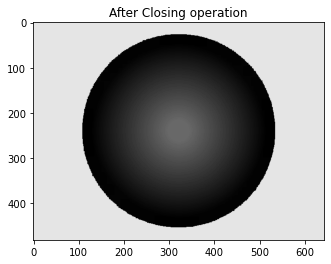

In [11]:
kernel=np.ones((7,7),np.uint8)
imageClosing=cv2.morphologyEx(image_noisy,cv2.MORPH_CLOSE,kernel,iterations=3)
plt.title('After Closing operation')
fig=plt.imshow(imageClosing,cmap='gray')

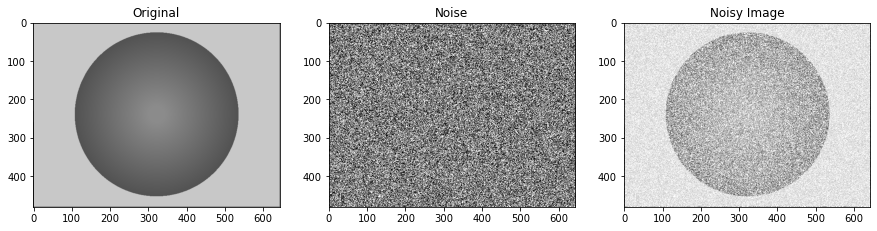

In [12]:
image_path=os.path.join('images','grad.png') #coloured image
image=cv2.imread(image_path,0)
noise_image=np.random.randint(0,2,image.shape,np.uint8)*255
image_noisy=cv2.bitwise_or(image,noise_image)
image_plot_multiple(['Original','Noise','Noisy Image'],[image,noise_image,image_noisy])

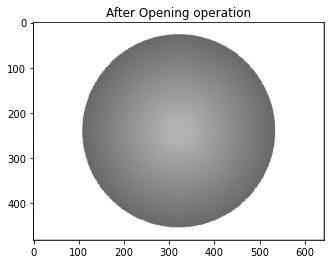

In [13]:
kernel=np.ones((7,7),np.uint8)
imageOpen=cv2.morphologyEx(image_noisy,cv2.MORPH_OPEN,kernel,iterations=3)
plt.title('After Opening operation')
fig=plt.imshow(imageOpen,cmap='gray')

# <center> Thank you